# **GRAPH ONTOLOGY**

A graph ontology is a formal representation of knowledge in the form of a graph, where nodes represent entities or concepts, and edges represent relationships between them. In the context of our city data, a graph ontology could represent cities as nodes, and relationships between them such as "is located in" or "is adjacent to" as edges.

Graph ontologies are useful for modeling complex relationships between entities and for querying and reasoning about the data. They are particularly useful in domains such as geography, social networks, and biology, where relationships between entities are critical to understanding the data.

In [205]:
!pip install rdflib

In [206]:
import rdflib
from rdflib import RDF, URIRef, BNode, Literal
from rdflib.namespace import RDF, RDFS, OWL, XSD
import xml.etree.ElementTree as ET
import csv
import json
import urllib.parse

In [207]:
g = rdflib.Graph()

In [208]:
city_names = []
populations = []
with open('popu.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        city_name, population = row
        city_names.append(city_name)
        populations.append(int(population))

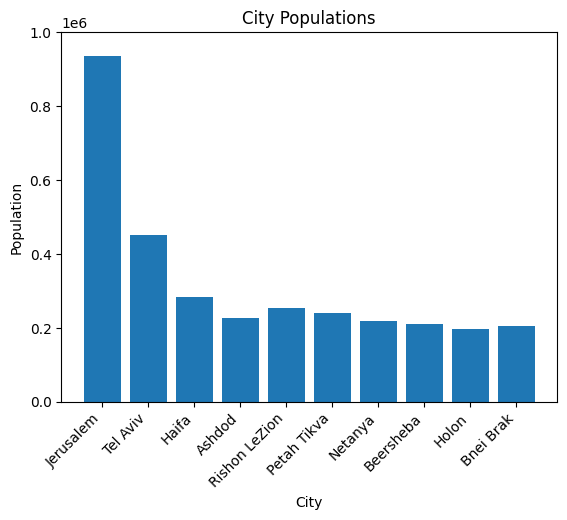

In [209]:
fig, ax = plt.subplots()
ax.bar(city_names, populations)

ax.set_title('City Populations')
ax.set_xlabel('City')
ax.set_ylabel('Population')
plt.xticks(rotation=45, ha='right')
ax.set_ylim(0, 1000000)

plt.show()

In [210]:
tree = ET.parse('/content/latilongi.xml')
root = tree.getroot()

In [211]:
for city in root.findall('.//city'):
    lat_element = city.find('latitude')
    long_element = city.find('longitude')
    if lat_element is not None and long_element is not None:
        lat = float(lat_element.text)
        long = float(long_element.text)
        lats.append(lat)
        longs.append(long)
    else:
        print(f"Warning: city element missing latitude or longitude: {city}")

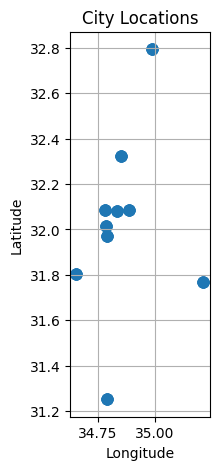

In [212]:
fig, ax = plt.subplots(figsize=(500, 5))
ax.set_title('City Locations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_aspect('equal')
ax.scatter(longs, lats, s=60)
ax.grid(True)
plt.show()

In [213]:
with open('arden.json') as f:
    data = json.load(f)

In [214]:
city_names = [item['city_name'] for item in data]
areas = [item['area'] for item in data]
densities = [item['density'] for item in data]

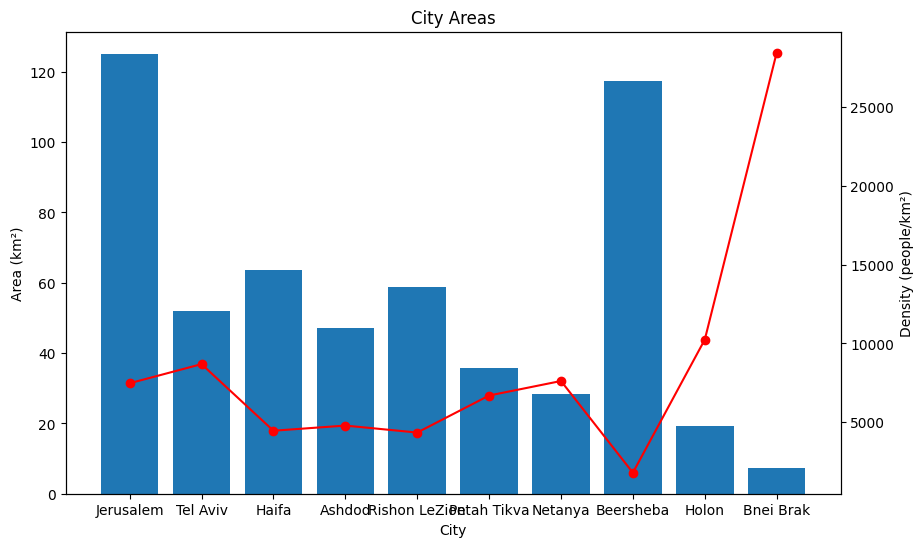

In [215]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(city_names, areas)
ax.set_xlabel('City')
ax.set_ylabel('Area (km²)')
ax.set_title('City Areas')
ax2 = ax.twinx()
ax2.plot(city_names, densities, 'ro-')
ax2.set_ylabel('Density (people/km²)')
plt.xticks(rotation=45, ha='right')

plt.show()

In [216]:
city_uri = CITY[urllib.parse.quote(name)]
GEO = rdflib.Namespace("http://www.opengis.net/ont/geosparql#")
GEONAMES = rdflib.Namespace("http://www.geonames.org/ontology#")

In [217]:
tree = ET.parse('latilongi.xml')
root = tree.getroot()

In [218]:
with open('popu.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)
    popu_data = {row[0]: int(row[1]) for row in reader}

In [219]:
with open('arden.json', 'r') as f:
    arden_data = json.load(f)
    arden_data = {item['city_name']: {'area': item['area'], 'density': item['density']} for item in arden_data}

In [220]:
for city in root.findall('city'):
    name = city.find('name').text
    latitude = city.find('latitude').text
    longitude = city.find('longitude').text
    population = popu_data.get(name)
    area = arden_data.get(name, {}).get('area')
    density = arden_data.get(name, {}).get('density')

    city_uri = CITY[name]
    g.add((city_uri, RDF.type, CITY.City))

    g.add((city_uri, CITY.hasName, Literal(name)))
    g.add((city_uri, CITY.hasPopulation, Literal(population)))
    g.add((city_uri, CITY.hasArea, Literal(area)))
    g.add((city_uri, CITY.hasDensity, Literal(density)))
    g.add((city_uri, GEO.lat, Literal(latitude)))
    g.add((city_uri, GEO.long, Literal(longitude)))

    geonames_uri = GEONAMES[name]
    g.add((city_uri, OWL.sameAs, geonames_uri))

# **RDF & SPARQL**

RDF (Resource Description Framework) is a standard for representing graph data on the web. It uses triples to represent data, where each triple consists of a subject, predicate, and object. For example, the triple <Jerusalem, isLocatedIn, Israel> represents the fact that Jerusalem is located in Israel.

SPARQL (SPARQL Protocol and RDF Query Language) is a query language for RDF data. It allows users to query RDF graphs using a syntax similar to SQL. For example, the SPARQL query SELECT ?city ?country WHERE { ?city isLocatedIn ?country } would retrieve all cities and their corresponding countries from an RDF graph.

In [221]:
import rdflib
import urllib
import xml.etree.ElementTree as ET
import csv
import json
import networkx as nx
import matplotlib.pyplot as plt
import csv

In [222]:
g = rdflib.Graph()

In [223]:
CITY = rdflib.Namespace("http://cityontology.org/")
GEO = rdflib.Namespace("http://www.opengis.net/ont/geosparql#")
GEONAMES = rdflib.Namespace("http://www.geonames.org/ontology#")
RDF = rdflib.Namespace("http://www.w3.org/1999/02/22-rdf-syntax-ns#")
OWL = rdflib

In [224]:
OWL = rdflib.Namespace("http://www.w3.org/2002/07/owl#")

In [225]:
import rdflib
import matplotlib.pyplot as plt
import networkx as nx

In [226]:
g = rdflib.Graph()
g.parse('cities.rdf', format='turtle')

for s, p, o in g:
    print(s, p, o)

http://example.org/city/TelAviv http://www.w3.org/2000/01/rdf-schema#label Tel Aviv
http://example.org/city/PetahTikva http://example.org/city/population 240322
http://example.org/city/Haifa http://www.opengis.net/ont/geosparql#lat 32.7940
http://example.org/city/TelAviv http://www.opengis.net/ont/geosparql#lat 32.0853
http://example.org/city/TelAviv http://example.org/city/population 451523
http://example.org/city/Holon http://example.org/city/area 19.2
http://example.org/city/TelAviv http://example.org/city/density 8684.6
http://example.org/city/RishonLeZion http://www.opengis.net/ont/geosparql#long 34.7894
http://example.org/city/RishonLeZion http://www.w3.org/2000/01/rdf-schema#label Rishon LeZion
http://example.org/city/RishonLeZion http://example.org/city/area 58.7
http://example.org/city/Ashdod http://www.w3.org/2000/01/rdf-schema#label Ashdod
http://example.org/city/BneiBrak http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://example.org/city/City
http://example.org/city/Bee

In [227]:
nx_graph = nx.DiGraph()
for s, p, o in g:
    nx_graph.add_edge(s, o, label=p)

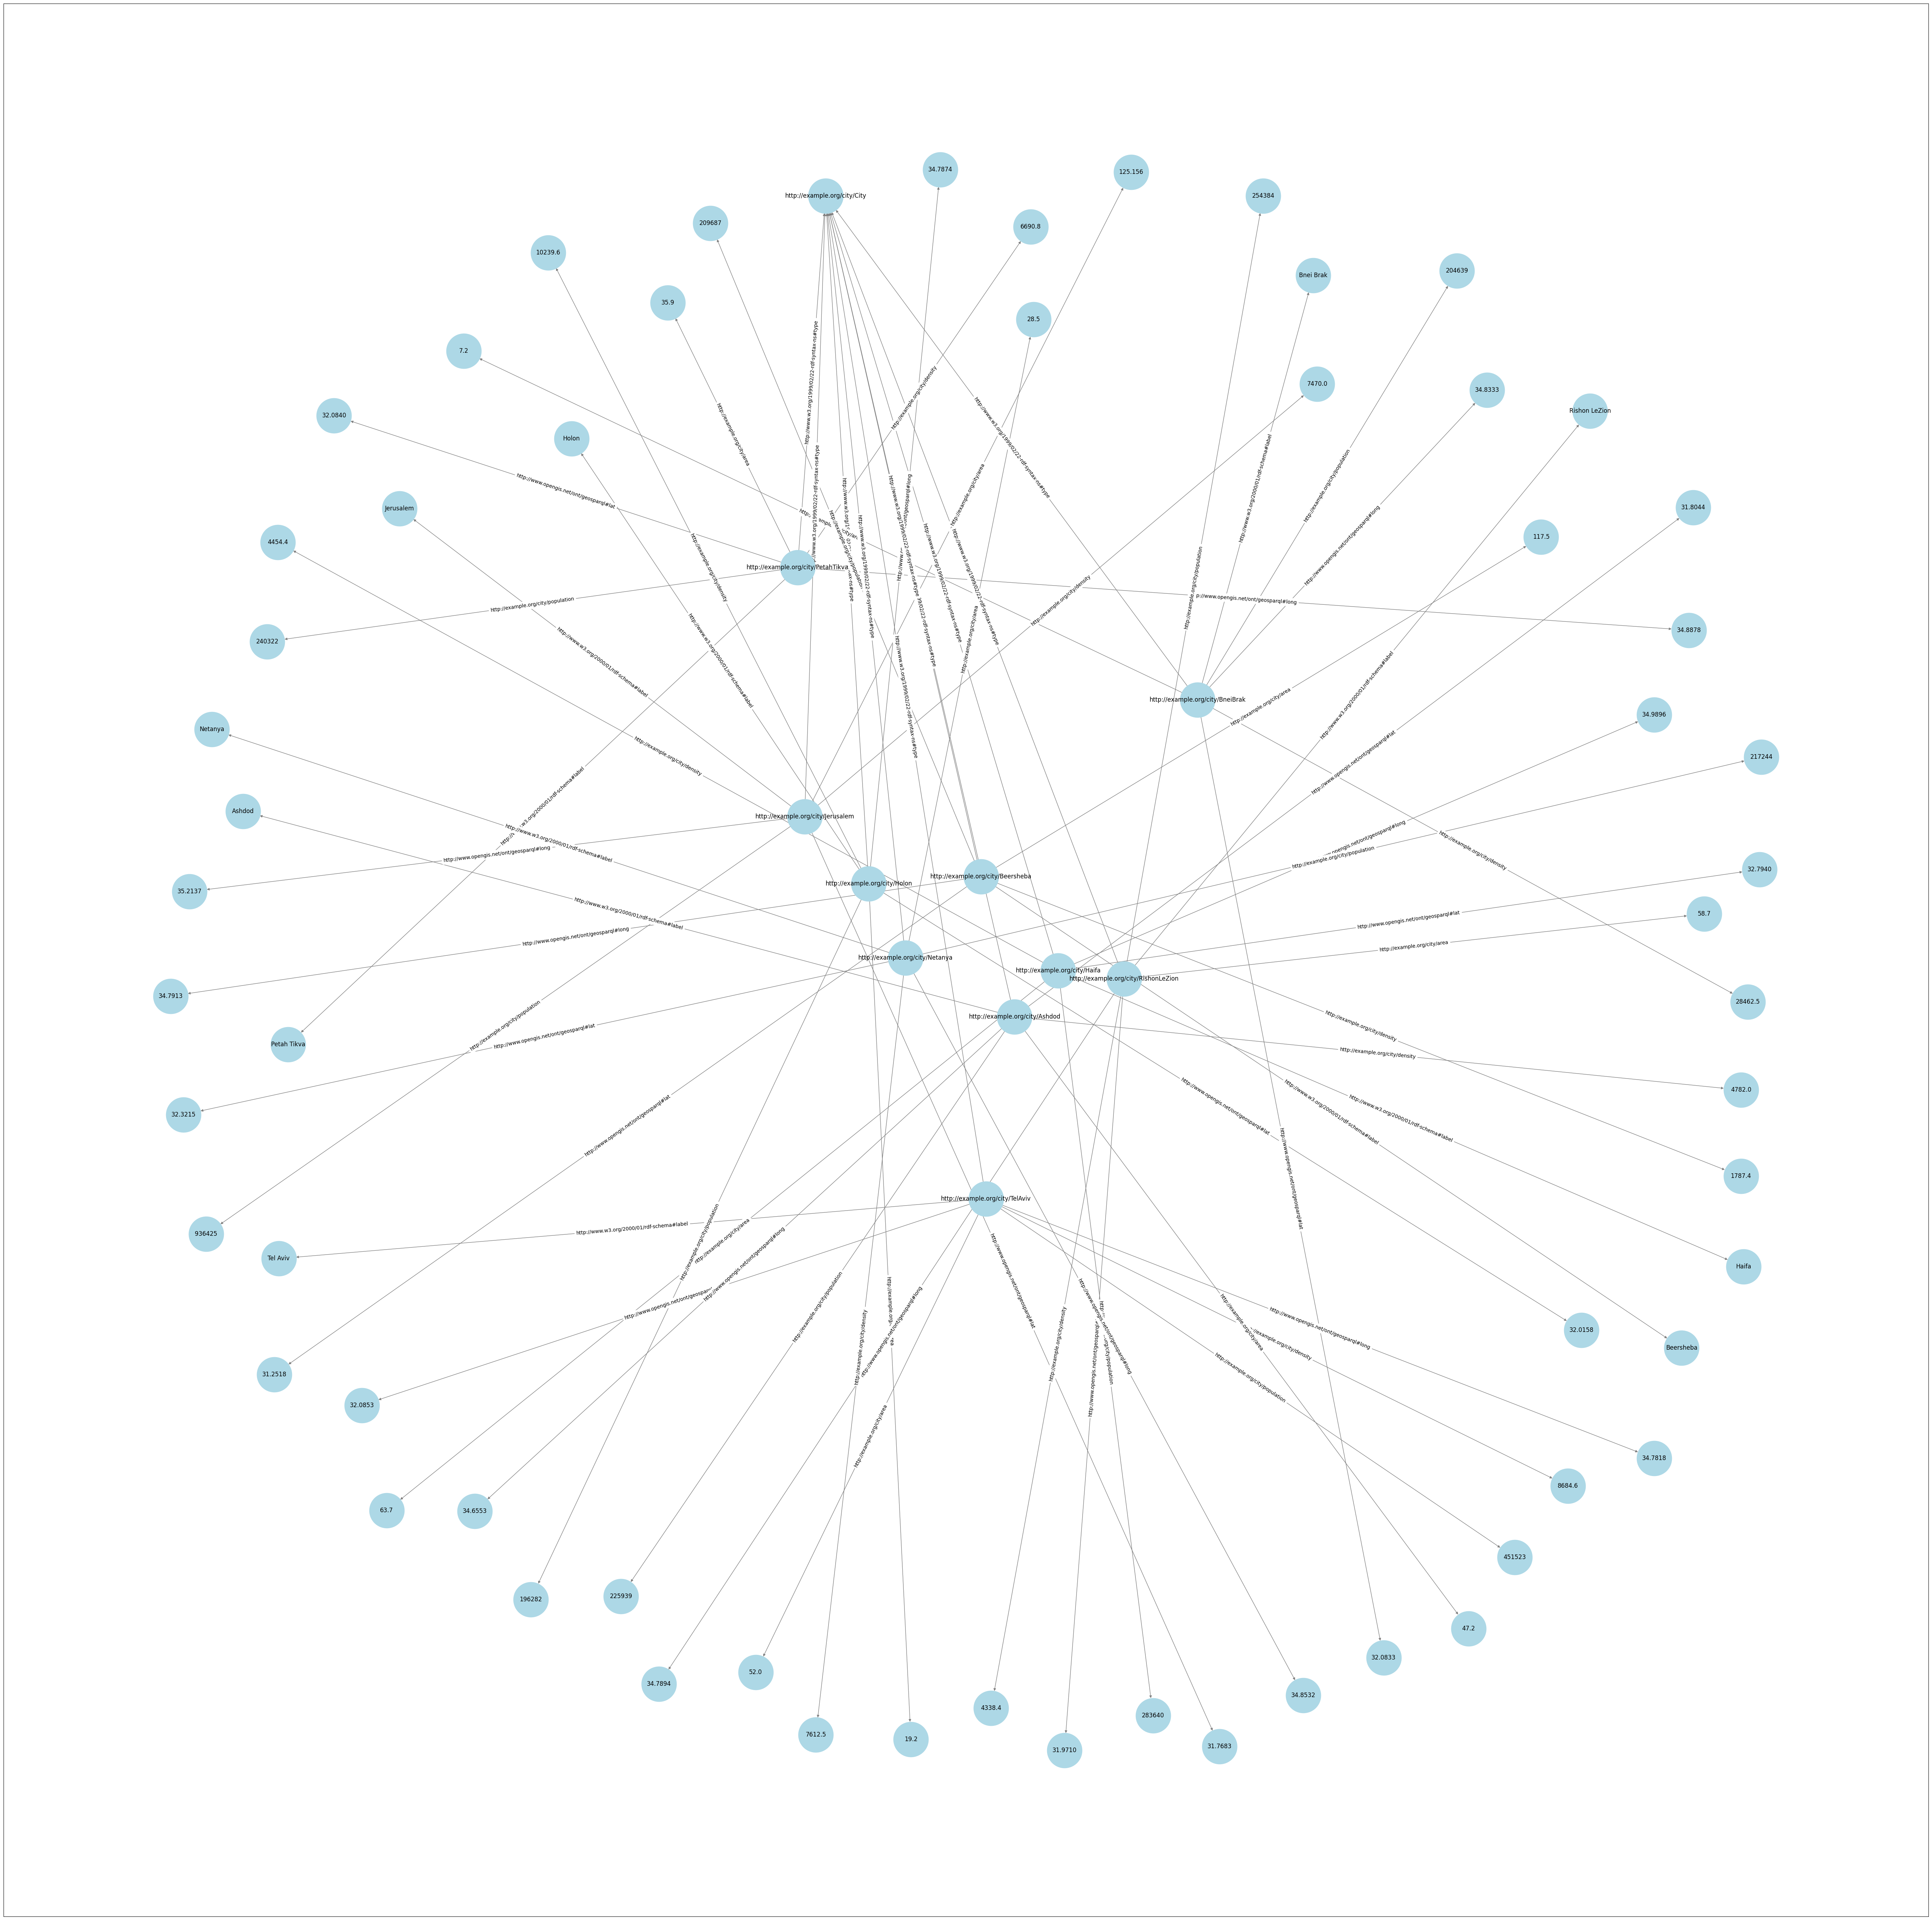

In [228]:
plt.figure(figsize=(70, 70))
pos = nx.spring_layout(nx_graph)
nx.draw_networkx(nx_graph, pos, with_labels=True, node_size=5000, node_color='lightblue', edge_color='gray')
edge_labels = nx.get_edge_attributes(nx_graph, 'label')
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels)
plt.show()

In [229]:
import rdflib
import matplotlib.pyplot as plt
import networkx as nx
import plotly.graph_objects as go
import geopandas as gpd
import networkx as nx
import pandas as pd
import folium

In [230]:
g = rdflib.Graph()
g.parse('cities.rdf', format='turtle')

nx_graph = nx.DiGraph()
for s, p, o in g:
    nx_graph.add_edge(s, o, label=p)

nodes = [
    {"name": "Jerusalem", "lat": 31.7683, "long": 35.2137, "population": 936425, "area": 125.156, "density": 7470.0},
    {"name": "Tel Aviv", "lat": 32.0853, "long": 34.7818, "population": 451523, "area": 52.0, "density": 8684.6},
    {"name": "Haifa", "lat": 32.7940, "long": 34.9896, "population": 283640, "area": 63.7, "density": 4454.4},
    {"name": "Ashdod", "lat": 31.8044, "long": 34.6553, "population": 225939, "area": 47.2, "density": 4782.0},
    {"name": "Rishon LeZion", "lat": 31.9710, "long": 34.7894, "population": 254384, "area": 58.7, "density": 4338.4},
    {"name": "Petah Tikva", "lat": 32.0840, "long": 34.8878, "population": 240322, "area": 35.9, "density": 6690.8},
    {"name": "Netanya", "lat": 32.3215, "long": 34.8532, "population": 217244, "area": 28.5, "density": 7612.5},
    {"name": "Beersheba", "lat": 31.2518, "long": 34.7913, "population": 209687, "area": 117.5, "density": 1787.4},
    {"name": "Holon", "lat": 32.0158, "long": 34.7874, "population": 196282, "area": 19.2, "density": 10239.6},
    {"name": "Bnei Brak", "lat": 32.0833, "long": 34.8333, "population": 204639, "area": 7.2, "density": 28462.5}
]

for node in nodes:
    G.add_node(node["name"], lat=node["lat"], long=node["long"], population=node["population"], area=node["area"], density=node["density"])

edges = [
    {"from": "Jerusalem", "to": "Tel Aviv"},
    {"from": "Jerusalem", "to": "Haifa"},
    {"from": "Tel Aviv", "to": "Ashdod"},
    {"from": "Tel Aviv", "to": "Rishon LeZion"},
    {"from": "Haifa", "to": "Netanya"},
    {"from": "Ashdod", "to": "Beersheba"},
    {"from": "Rishon LeZion", "to": "Petah Tikva"},
    {"from": "Petah Tikva", "to": "Holon"},
    {"from": "Holon", "to": "Bnei Brak"}
]

for edge in edges:
    G.add_edge(edge["from"], edge["to"])

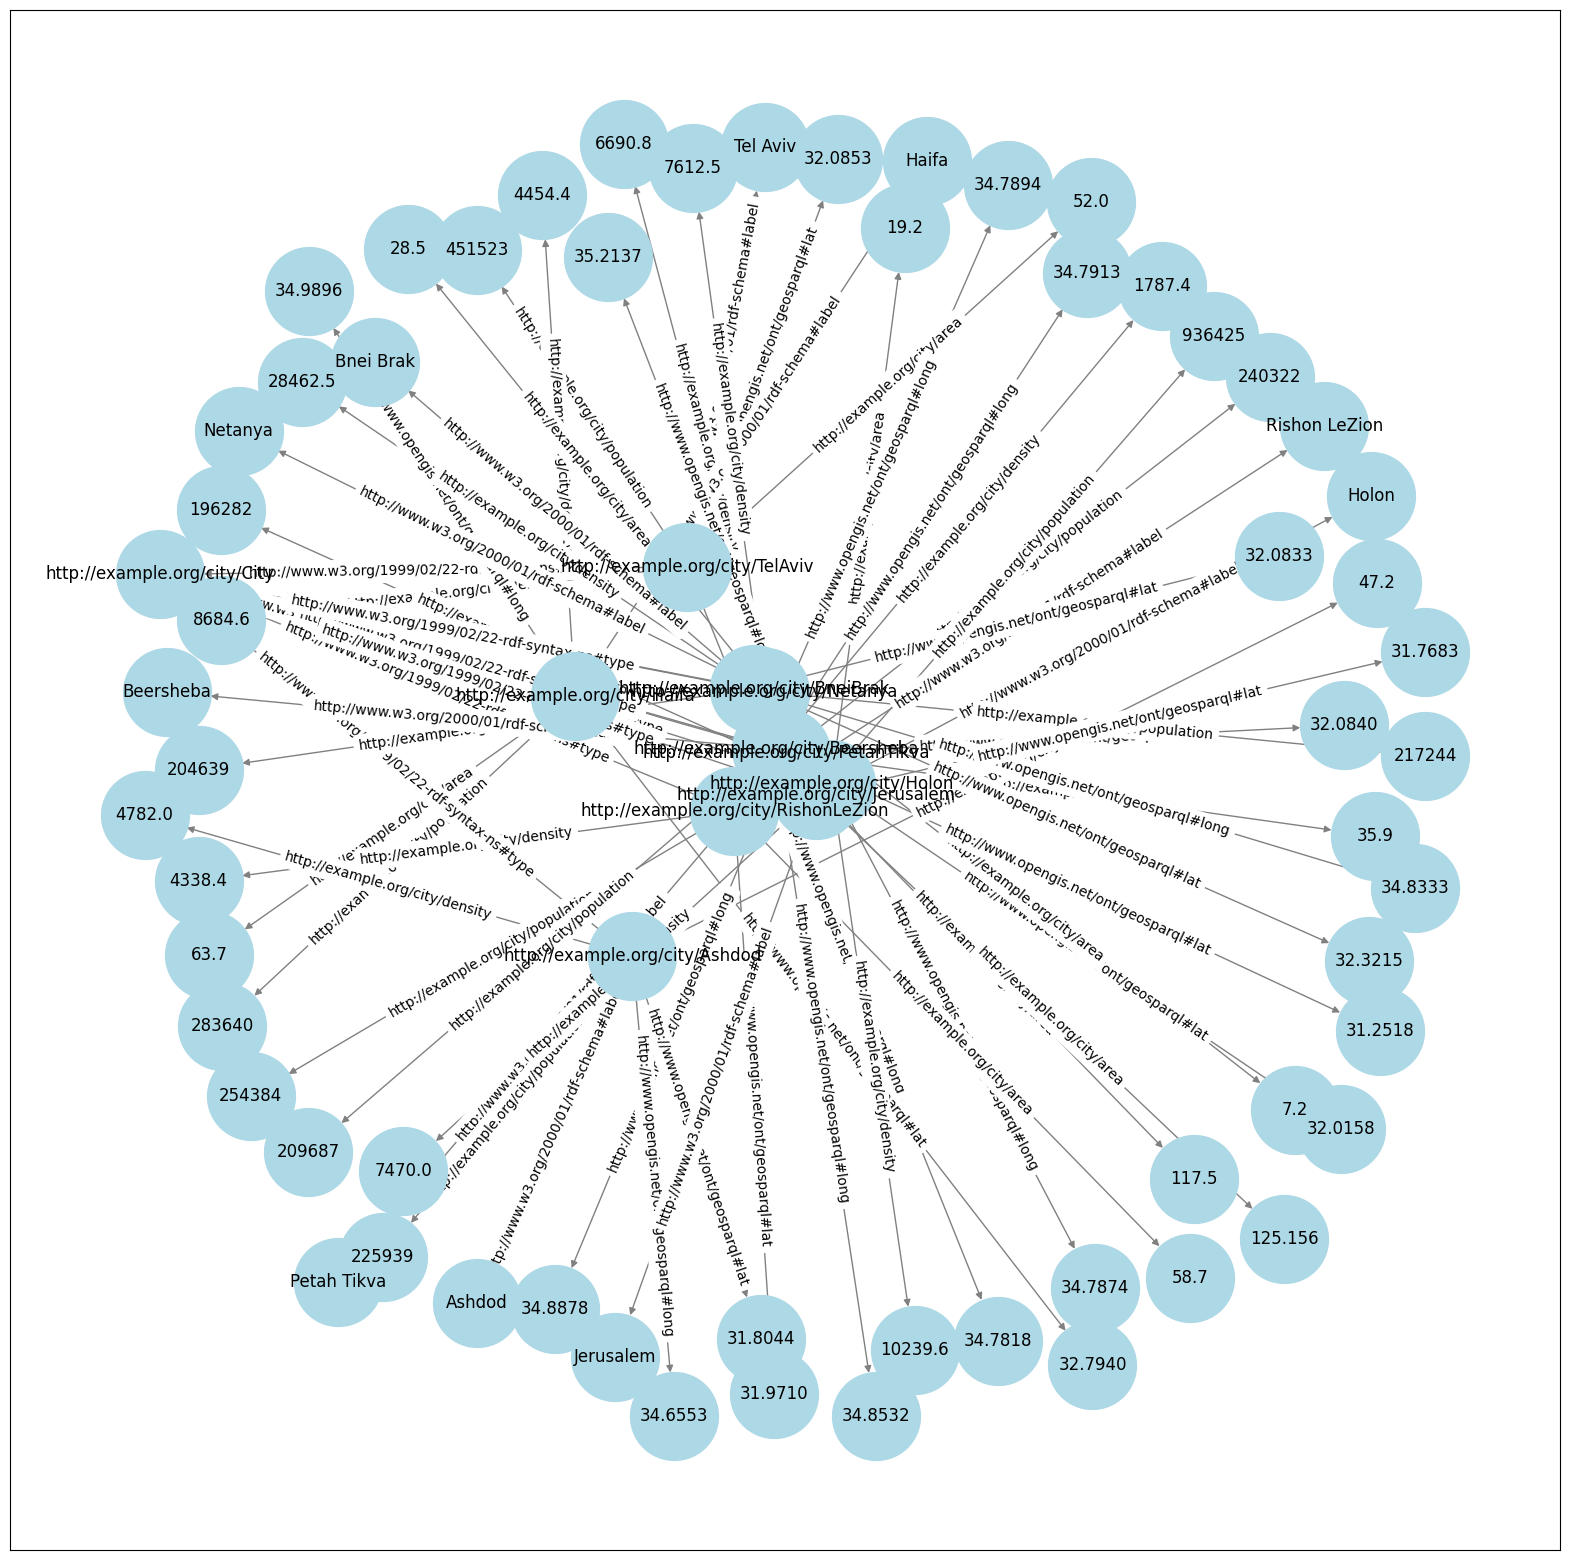

In [231]:
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(nx_graph)
nx.draw_networkx(nx_graph, pos, with_labels=True, node_size=4000, node_color='lightblue', edge_color='gray')
edge_labels = nx.get_edge_attributes(nx_graph, 'label')
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels)
plt.show()

In [232]:
fig = go.Figure(data=[go.Scatter(x=[node[0] for node in nx_graph.nodes()], y=[node[1] for node in nx_graph.nodes()], mode='markers', marker=dict(size=10, color='lightblue'))])
fig.update_layout(width=1300, height=800)
fig.show()

#**GRAPH QUERYING**

Graph querying involves querying a graph database to retrieve specific data or patterns. There are several types of graph queries, including:

1. Node queries:- Retrieve specific nodes or entities from the graph.
2. Edge queries:- Retrieve specific edges or relationships from the graph.
3. Path queries:- Retrieve paths or sequences of edges between nodes in the graph.
4. Pattern queries:- Retrieve nodes and edges that match a specific pattern or structure.

Graph querying is useful for a wide range of applications, including social network analysis, recommendation systems, and knowledge graph querying.

In [233]:
import rdflib
from rdflib.namespace import RDF, RDFS, OWL
from rdflib.plugins.stores import sparqlstore

In [234]:
g = rdflib.Graph()
g.parse('cities.rdf', format='turtle')

print("RDF data:")
print(g.serialize(format='turtle'))

RDF data:
@prefix CITY: <http://example.org/city/> .
@prefix GEO: <http://www.opengis.net/ont/geosparql#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

CITY:Ashdod a CITY:City ;
    rdfs:label "Ashdod" ;
    CITY:area "47.2" ;
    CITY:density "4782.0" ;
    CITY:population "225939" ;
    GEO:lat "31.8044" ;
    GEO:long "34.6553" .

CITY:Beersheba a CITY:City ;
    rdfs:label "Beersheba" ;
    CITY:area "117.5" ;
    CITY:density "1787.4" ;
    CITY:population "209687" ;
    GEO:lat "31.2518" ;
    GEO:long "34.7913" .

CITY:BneiBrak a CITY:City ;
    rdfs:label "Bnei Brak" ;
    CITY:area "7.2" ;
    CITY:density "28462.5" ;
    CITY:population "204639" ;
    GEO:lat "32.0833" ;
    GEO:long "34.8333" .

CITY:Haifa a CITY:City ;
    rdfs:label "Haifa" ;
    CITY:area "63.7" ;
    CITY:density "4454.4" ;
    CITY:population "283640" ;
    GEO:lat "32.7940" ;
    GEO:long "34.9896" .

CITY:Holon a CITY:City ;
    rdfs:label "Holon" ;
    CITY:area "19.2" ;
    CITY:density

In [235]:
query = """
PREFIX CITY: <http://example.org/city/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT ?label ?population
WHERE {
  ?city a CITY:City ;
        rdfs:label ?label ;
        CITY:population ?population.
}
ORDER BY DESC(?population)
LIMIT 3
"""

results = g.query(query)
for row in results:
    print(f"City: {row[0]} - Population: {row[1]}")

City: Jerusalem - Population: 936425
City: Tel Aviv - Population: 451523
City: Haifa - Population: 283640


In [236]:
query = """
PREFIX CITY: <http://example.org/city/>
PREFIX GEO: <http://www.opengis.net/ont/geosparql#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?label ?population
WHERE {
  ?city a CITY:City ;
        rdfs:label ?label ;
        CITY:population ?population.
}
ORDER BY ASC(?population)
LIMIT 3
"""

results = g.query(query)
for row in results:
    print(f"City: {row[0]} - Population: {row[1]}")

City: Holon - Population: 196282
City: Bnei Brak - Population: 204639
City: Beersheba - Population: 209687


In [237]:
query = """
PREFIX CITY: <http://example.org/city/>

SELECT (COUNT(DISTINCT ?city) AS ?totalCities)
WHERE {
  ?city a CITY:City .
}
"""

results = g.query(query)
for row in results:
    print(f"Total Cities: {row[0].toPython()}")

Total Cities: 10


##**Benefits of Graph Ontology and Querying**
The benefits of using graph ontology and querying include:

1. Improved data integration:- Graph ontologies can integrate data from multiple sources and provide a unified view of the data.
2. Enhanced querying capabilities:- Graph querying allows users to query complex relationships and patterns in the data.
3. Increased scalability:- Graph databases can handle large amounts of data and scale horizontally.

By using graph ontology and querying, we can gain new insights into our city data and answer complex questions such as "What cities are located in the same region?" or "What is the shortest path between two cities?"